### USING PYTHON FOR ACCESSING DATABASE VIA SQL QUERIES

Install ipython-sql

In [1]:
! pip install ipython-sql

Load sql

In [4]:
%load_ext sql

Loading database file

In [5]:
%sql sqlite:///F:/Data_Sets/chinook.db

### SQL Syntax

List all items of playlists, order by name descending

In [7]:
%sql SELECT * FROM playlists ORDER BY Name DESC

 * sqlite:///F:/Data_Sets/chinook.db
Done.


PlaylistId,Name
3,TV Shows
10,TV Shows
18,On-The-Go 1
9,Music Videos
1,Music
8,Music
2,Movies
7,Movies
17,Heavy Metal Classic
16,Grunge


List all items of tracks, order by name descending, limit 10

In [8]:
%sql SELECT * FROM tracks ORDER BY Name DESC LIMIT 10

 * sqlite:///F:/Data_Sets/chinook.db
Done.


TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
1077,Último Pau-De-Arara,85,1,10,Corumbá/José Gumarães/Venancio,200437,6638563,0.99
1073,Óia Eu Aqui De Novo,85,1,10,None,219454,7469735,0.99
2078,Óculos,169,1,7,None,219271,7262419,0.99
3496,"Étude 1, In C Major - Preludio (Presto) - Liszt",340,4,24,None,51780,2229617,0.99
333,É que Nessa Encarnação Eu Nasci Manga,29,1,9,Lucina/Luli,196519,6568081,0.99
2461,É Uma Partida De Futebol,200,1,1,Samuel Rosa,1071,38747,0.99
2817,É Preciso Saber Viver,225,1,4,Erasmo Carlos/Roberto Carlos,251115,8271418,0.99
1963,É Fogo,161,1,16,Mônica Marianno,194873,6501520,0.99
857,Álibi,69,1,7,None,213237,6928434,0.99
379,Água de Beber,33,1,7,Antonio Carlos Jobim/Vinicius de Moraes,146677,4866476,0.99


List Total Number Albums by Genre, order by total number 

In [16]:
%%sql
SELECT DISTINCT GenreId, COUNT(AlbumId) OVER(PARTITION BY GenreId) AS 'Number of Albums by Genre' 
 FROM tracks 

 * sqlite:///F:/Data_Sets/chinook.db
Done.


GenreId,Number of Albums by Genre
1,1297
2,130
3,374
4,332
5,12
6,81
7,579
8,58
9,48
10,43


### Syntax Difference with Multiple Rows

List Years from employees table (Date syntax difference for sqlite)

## SQL query result to Python DataFrame

In [17]:
%sql SELECT * FROM employees

 * sqlite:///F:/Data_Sets/chinook.db
Done.


EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
1,Adams,Andrew,General Manager,None,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
2,Edwards,Nancy,Sales Manager,1,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
3,Peacock,Jane,Sales Support Agent,2,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
4,Park,Margaret,Sales Support Agent,2,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
5,Johnson,Steve,Sales Support Agent,2,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
6,Mitchell,Michael,IT Manager,1,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
7,King,Robert,IT Staff,6,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
8,Callahan,Laura,IT Staff,6,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


In [18]:
result = %sql SELECT * FROM employees

 * sqlite:///F:/Data_Sets/chinook.db
Done.


In [23]:
type(result)

sql.run.ResultSet

In [19]:
result_df = result.DataFrame()

In [20]:
result_df

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,1.0,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
6,7,King,Robert,IT Staff,6.0,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,6.0,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


In [21]:
type(result_df)

pandas.core.frame.DataFrame

In [22]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EmployeeId  8 non-null      int64  
 1   LastName    8 non-null      object 
 2   FirstName   8 non-null      object 
 3   Title       8 non-null      object 
 4   ReportsTo   7 non-null      float64
 5   BirthDate   8 non-null      object 
 6   HireDate    8 non-null      object 
 7   Address     8 non-null      object 
 8   City        8 non-null      object 
 9   State       8 non-null      object 
 10  Country     8 non-null      object 
 11  PostalCode  8 non-null      object 
 12  Phone       8 non-null      object 
 13  Fax         8 non-null      object 
 14  Email       8 non-null      object 
dtypes: float64(1), int64(1), object(13)
memory usage: 1.1+ KB


In [24]:
result_df.describe

<bound method NDFrame.describe of    EmployeeId  LastName FirstName                Title  ReportsTo  \
0           1     Adams    Andrew      General Manager        NaN   
1           2   Edwards     Nancy        Sales Manager        1.0   
2           3   Peacock      Jane  Sales Support Agent        2.0   
3           4      Park  Margaret  Sales Support Agent        2.0   
4           5   Johnson     Steve  Sales Support Agent        2.0   
5           6  Mitchell   Michael           IT Manager        1.0   
6           7      King    Robert             IT Staff        6.0   
7           8  Callahan     Laura             IT Staff        6.0   

             BirthDate             HireDate                      Address  \
0  1962-02-18 00:00:00  2002-08-14 00:00:00          11120 Jasper Ave NW   
1  1958-12-08 00:00:00  2002-05-01 00:00:00                 825 8 Ave SW   
2  1973-08-29 00:00:00  2002-04-01 00:00:00                1111 6 Ave SW   
3  1947-09-19 00:00:00  2003-05-03 00:00

Another Example

In [25]:
result1 = %sql SELECT * FROM tracks

 * sqlite:///F:/Data_Sets/chinook.db
Done.


In [26]:
result1_df = result1.DataFrame()

In [27]:
result1_df.head()

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


In [29]:
result1_df['UnitPrice'].mean()

1.0508050242649158

<AxesSubplot:>

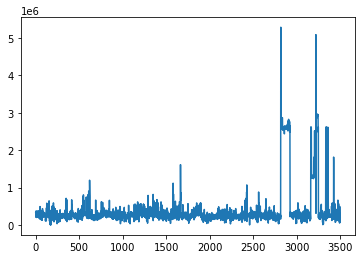

In [31]:
result1_df['Milliseconds'].plot()

Data Output csv

In [32]:
result1_df.to_csv('result1.csv')

List Total Number Albums by Genre and Genre Name, order by total number 

In [26]:
%%sql 
SELECT G.GenreId, G.Name, COUNT(T.AlbumId) AS 'Number of Albums by Genre' FROM tracks T 
                        JOIN genres G ON T.GenreId=G.GenreId GROUP BY T.GenreId ORDER BY 3 DESC

 * sqlite:///F:/Data_Sets/chinook.db
Done.


GenreId,Name,Number of Albums by Genre
1,Rock,1297
7,Latin,579
3,Metal,374
4,Alternative & Punk,332
2,Jazz,130
19,TV Shows,93
6,Blues,81
24,Classical,74
21,Drama,64
14,R&B/Soul,61


In [28]:
%%sql
SELECT * FROM employees LIMIT 1

 * sqlite:///F:/Data_Sets/chinook.db
Done.


EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
1,Adams,Andrew,General Manager,None,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com


In [54]:
%%sql
SELECT FirstName || ' ' || LastName AS 'Full Name' , strftime('%Y', HireDate) - strftime('%Y', BirthDate) as "Age of Employment" FROM employees 

 * sqlite:///F:/Data_Sets/chinook.db
Done.


Full Name,Age of Employment
Andrew Adams,40
Nancy Edwards,44
Jane Peacock,29
Margaret Park,56
Steve Johnson,38
Michael Mitchell,30
Robert King,34
Laura Callahan,36


In [76]:
%%sql 
SELECT FirstName || ' ' || LastName AS 'Full Name' , strftime('%Y', HireDate) - strftime('%Y', BirthDate) as "Age of Employment" FROM Employees 

 * sqlite:///F:/Data_Sets/chinook.db
Done.


Full Name,Age of Employment
Andrew Adams,40
Nancy Edwards,44
Jane Peacock,29
Margaret Park,56
Steve Johnson,38
Michael Mitchell,30
Robert King,34
Laura Callahan,36


In [59]:
result = %sql SELECT * FROM employees

 * sqlite:///F:/Data_Sets/chinook.db
Done.


In [61]:
result_df = result.DataFrame()

In [66]:
result_df

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,1.0,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
6,7,King,Robert,IT Staff,6.0,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,6.0,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


In [84]:
result1_df['UnitPrice'].value_counts()

0.99    3290
1.99     213
Name: UnitPrice, dtype: int64

List CustomerID, FirstName, LastName and Total Transaction of customers with 10 highest transaction amount

In [109]:
%sql SELECT C.CustomerId,C.FirstName,C.LastName, ROUND(SUM(I.Total),2) AS 'Total Transaction' FROM invoices I JOIN customers C ON I.CustomerId = C.CustomerId GROUP BY C.CustomerId ORDER BY SUM(I.Total) DESC LIMIT 10

 * sqlite:///F:/Data_Sets/chinook.db
Done.


CustomerId,FirstName,LastName,Total Transaction
6,Helena,Holý,49.62
26,Richard,Cunningham,47.62
57,Luis,Rojas,46.62
45,Ladislav,Kovács,45.62
46,Hugh,O'Reilly,45.62
28,Julia,Barnett,43.62
24,Frank,Ralston,43.62
37,Fynn,Zimmermann,43.62
7,Astrid,Gruber,42.62
25,Victor,Stevens,42.62


In [112]:
%sql SELECT * FROM tracks LIMIT 5

 * sqlite:///F:/Data_Sets/chinook.db
Done.


TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Hoffman",230619,3990994,0.99
4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. Dirkscneider & W. Hoffman",252051,4331779,0.99
5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


In [113]:
%sql SELECT * FROM invoice_items LIMIT 5

 * sqlite:///F:/Data_Sets/chinook.db
Done.


InvoiceLineId,InvoiceId,TrackId,UnitPrice,Quantity
1,1,2,0.99,1
2,1,4,0.99,1
3,2,6,0.99,1
4,2,8,0.99,1
5,2,10,0.99,1


In [117]:
%sql SELECT TrackId, SUM(Quantity) FROM invoice_items GROUP BY TrackId ORDER BY 2 DESC LIMIT 5

 * sqlite:///F:/Data_Sets/chinook.db
Done.


TrackId,SUM(Quantity)
2,2
8,2
9,2
20,2
32,2


In [126]:
%%sql 
SELECT * FROM albums A JOIN tracks T ON  
A.AlbumId = T.AlbumId  JOIN invoice_items I ON I.TrackId = T.TrackId LIMIT 5

 * sqlite:///F:/Data_Sets/chinook.db
Done.


AlbumId,Title,ArtistId,TrackId,Name,AlbumId_1,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice,InvoiceLineId,InvoiceId,TrackId_1,UnitPrice_1,Quantity
2,Balls to the Wall,2,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99,1,1,2,0.99,1
3,Restless and Wild,2,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. Dirkscneider & W. Hoffman",252051,4331779,0.99,2,1,4,0.99,1
1,For Those About To Rock We Salute You,1,6,Put The Finger On You,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",205662,6713451,0.99,3,2,6,0.99,1
1,For Those About To Rock We Salute You,1,8,Inject The Venom,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",210834,6852860,0.99,4,2,8,0.99,1
1,For Those About To Rock We Salute You,1,10,Evil Walks,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",263497,8611245,0.99,5,2,10,0.99,1


In [137]:
%%sql 
SELECT A.ArtistId, AR.Name, SUM(I.Quantity) 'Total Invoice' FROM albums A 
        JOIN tracks T ON  A.AlbumId = T.AlbumId  
        JOIN invoice_items I ON I.TrackId = T.TrackId 
        JOIN artists AR ON AR.ArtistID = A.ArtistID
        GROUP BY A.ArtistId ORDER BY 3 DESC LIMIT 5

 * sqlite:///F:/Data_Sets/chinook.db
Done.


ArtistId,Name,Total Invoice
90,Iron Maiden,140
150,U2,107
50,Metallica,91
22,Led Zeppelin,87
113,Os Paralamas Do Sucesso,45


In [144]:
%sql SELECT A.ArtistId, AR.Name, SUM(I.Quantity) 'Total Invoice' FROM albums A JOIN tracks T ON A.AlbumId = T.AlbumId JOIN invoice_items I ON I.TrackId = T.TrackId JOIN artists AR ON AR.ArtistID = A.ArtistID GROUP BY A.ArtistId ORDER BY 3 DESC LIMIT 10

 * sqlite:///F:/Data_Sets/chinook.db
Done.


ArtistId,Name,Total Invoice
90,Iron Maiden,140
150,U2,107
50,Metallica,91
22,Led Zeppelin,87
113,Os Paralamas Do Sucesso,45
58,Deep Purple,44
82,Faith No More,42
149,Lost,41
81,Eric Clapton,40
124,R.E.M.,39


In [145]:
most_pop = %sql SELECT A.ArtistId, AR.Name, SUM(I.Quantity) 'Total Invoice' FROM albums A JOIN tracks T ON A.AlbumId = T.AlbumId JOIN invoice_items I ON I.TrackId = T.TrackId JOIN artists AR ON AR.ArtistID = A.ArtistID GROUP BY A.ArtistId ORDER BY 3 DESC LIMIT 10

 * sqlite:///F:/Data_Sets/chinook.db
Done.


In [146]:
most_pop_df = most_pop.DataFrame()

In [148]:
most_pop_df

,ArtistId,Name,Total Invoice
0,90,Iron Maiden,140
1,150,U2,107
2,50,Metallica,91
3,22,Led Zeppelin,87
4,113,Os Paralamas Do Sucesso,45
5,58,Deep Purple,44
6,82,Faith No More,42
7,149,Lost,41
8,81,Eric Clapton,40
9,124,R.E.M.,39


C:\Users\Tony\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


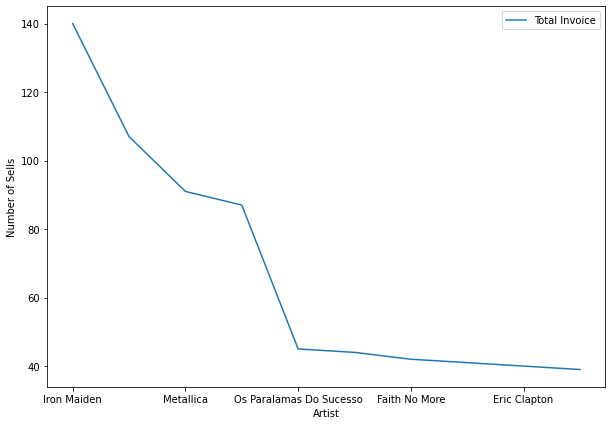

In [154]:
most_pop_df.plot(x='Name', y='Total Invoice',figsize=(10,7),ylabel='Number of Sells', xlabel='Artist');